In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader,TensorDataset
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import style

In [2]:
style.use('ggplot')   

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
data=pd.read_csv('Train_14_18.csv')
train=data.drop(labels=['School','W','L','Rk','Year'],axis=1)
data_v=pd.read_csv('Valid_18_20.csv')
val=data_v.drop(labels=['School','W','L','Rk','Year'],axis=1)
data_t=pd.read_csv('Test_20_22.csv')
test=data_t.drop(labels=['School','W','L','Rk','Year'],axis=1)
test.dropna(inplace=True)

In [5]:
train

,G,SRS,SOS,Tm.,Opp.,MP,FG,FGA,FG%,3P,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,W-L%
0,31,-17.20,-6.34,1976,2186,1240,695,1684,0.413,232,...,487,0.727,274,897,394,203,38,399,661,0.323
1,31,-1.85,-0.71,2037,2017,1245,742,1565,0.474,232,...,487,0.659,265,930,483,195,65,366,552,0.452
2,35,3.65,-0.47,2382,2203,1406,824,1982,0.416,328,...,617,0.658,420,1249,435,230,155,422,654,0.600
3,29,-17.15,-9.62,1797,1988,1165,608,1533,0.397,166,...,643,0.645,367,998,354,165,68,413,573,0.310
4,36,1.94,1.62,2476,2452,1480,873,2042,0.428,202,...,715,0.738,434,1322,516,237,184,482,630,0.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,35,0.58,-3.64,2500,2307,1410,873,2019,0.432,237,...,723,0.715,356,1266,460,231,77,459,558,0.714
1400,33,4.26,3.54,2633,2597,1365,873,1959,0.446,304,...,790,0.738,231,1148,518,215,130,449,654,0.606
1401,35,19.06,9.43,2953,2616,1415,1011,2055,0.492,274,...,843,0.779,345,1342,579,205,109,441,602,0.829
1402,31,-4.19,-2.83,2312,2288,1250,831,1797,0.462,252,...,551,0.722,275,1052,507,204,95,407,541,0.516


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       1404 non-null   int64  
 1   SRS     1404 non-null   float64
 2   SOS     1404 non-null   float64
 3   Tm.     1404 non-null   int64  
 4   Opp.    1404 non-null   int64  
 5   MP      1404 non-null   int64  
 6   FG      1404 non-null   int64  
 7   FGA     1404 non-null   int64  
 8   FG%     1404 non-null   float64
 9   3P      1404 non-null   int64  
 10  3PA     1404 non-null   int64  
 11  3P%     1404 non-null   float64
 12  FT      1404 non-null   int64  
 13  FTA     1404 non-null   int64  
 14  FT%     1404 non-null   float64
 15  ORB     1404 non-null   int64  
 16  TRB     1404 non-null   int64  
 17  AST     1404 non-null   int64  
 18  STL     1404 non-null   int64  
 19  BLK     1404 non-null   int64  
 20  TOV     1404 non-null   int64  
 21  PF      1404 non-null   int64  
 22  

In [7]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       706 non-null    int64  
 1   SRS     706 non-null    float64
 2   SOS     706 non-null    float64
 3   Tm.     706 non-null    int64  
 4   Opp.    706 non-null    int64  
 5   MP      706 non-null    int64  
 6   FG      706 non-null    int64  
 7   FGA     706 non-null    int64  
 8   FG%     706 non-null    float64
 9   3P      706 non-null    int64  
 10  3PA     706 non-null    int64  
 11  3P%     706 non-null    float64
 12  FT      706 non-null    int64  
 13  FTA     706 non-null    int64  
 14  FT%     706 non-null    float64
 15  ORB     706 non-null    int64  
 16  TRB     706 non-null    int64  
 17  AST     706 non-null    int64  
 18  STL     706 non-null    int64  
 19  BLK     706 non-null    int64  
 20  TOV     706 non-null    int64  
 21  PF      706 non-null    int64  
 22  W-

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 712
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       705 non-null    int64  
 1   SRS     705 non-null    float64
 2   SOS     705 non-null    float64
 3   Tm.     705 non-null    float64
 4   Opp.    705 non-null    float64
 5   MP      705 non-null    float64
 6   FG      705 non-null    float64
 7   FGA     705 non-null    float64
 8   FG%     705 non-null    float64
 9   3P      705 non-null    float64
 10  3PA     705 non-null    float64
 11  3P%     705 non-null    float64
 12  FT      705 non-null    float64
 13  FTA     705 non-null    float64
 14  FT%     705 non-null    float64
 15  ORB     705 non-null    float64
 16  TRB     705 non-null    float64
 17  AST     705 non-null    float64
 18  STL     705 non-null    float64
 19  BLK     705 non-null    float64
 20  TOV     705 non-null    float64
 21  PF      705 non-null    float64
 22  W-

In [9]:
xtrain,ytrain=train.iloc[:,:-1],train.iloc[:,-1:]
xval,yval=val.iloc[:,:-1],val.iloc[:,-1:]
xtest,ytest=test.iloc[:,:-1],test.iloc[:,-1:]
#split

In [10]:
xtrain

,G,SRS,SOS,Tm.,Opp.,MP,FG,FGA,FG%,3P,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,31,-17.20,-6.34,1976,2186,1240,695,1684,0.413,232,...,354,487,0.727,274,897,394,203,38,399,661
1,31,-1.85,-0.71,2037,2017,1245,742,1565,0.474,232,...,321,487,0.659,265,930,483,195,65,366,552
2,35,3.65,-0.47,2382,2203,1406,824,1982,0.416,328,...,406,617,0.658,420,1249,435,230,155,422,654
3,29,-17.15,-9.62,1797,1988,1165,608,1533,0.397,166,...,415,643,0.645,367,998,354,165,68,413,573
4,36,1.94,1.62,2476,2452,1480,873,2042,0.428,202,...,528,715,0.738,434,1322,516,237,184,482,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,35,0.58,-3.64,2500,2307,1410,873,2019,0.432,237,...,517,723,0.715,356,1266,460,231,77,459,558
1400,33,4.26,3.54,2633,2597,1365,873,1959,0.446,304,...,583,790,0.738,231,1148,518,215,130,449,654
1401,35,19.06,9.43,2953,2616,1415,1011,2055,0.492,274,...,657,843,0.779,345,1342,579,205,109,441,602
1402,31,-4.19,-2.83,2312,2288,1250,831,1797,0.462,252,...,398,551,0.722,275,1052,507,204,95,407,541


In [11]:
ytrain

,W-L%
0,0.323
1,0.452
2,0.600
3,0.310
4,0.556
...,...
1399,0.714
1400,0.606
1401,0.829
1402,0.516


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
stand= MinMaxScaler()
xtrain_=stand.fit_transform(xtrain)
xval_=stand.fit_transform(xval)
xtest_=stand.fit_transform(xtest)
ytrain_=stand.fit_transform(ytrain)
yval_=stand.fit_transform(yval)
ytest_=stand.fit_transform(ytest)
##normalize

In [30]:
train_=TensorDataset(torch.from_numpy(xtrain_),torch.from_numpy(ytrain_))
val_=TensorDataset(torch.from_numpy(xval_),torch.from_numpy(yval_))
train_loader=DataLoader(train_,batch_size=240)
val_loader=DataLoader(val_,batch_size=240)

In [31]:
class lstm_1(nn.Module):
    def __init__(self):
        super(lstm_1,self).__init__()
        self.lstm=nn.LSTM(input_size=22,hidden_size=256,num_layers=4,batch_first=True)
        self.fc=nn.Linear(256,1)
    def forward(self,x):
        x,(h,c)=self.lstm(x)
        x=x.view(-1,256)
        x=self.fc(x)
        return x       
#lstm model

In [32]:
model=lstm_1()
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [33]:
model.train()
train_loss=[]
val_loss=[]
for e in np.arange(100):
    losses=0
    n=0
    for X,Y in train_loader:
        X=X.float()
        Y=Y.float()
        out=model(X)
        out=out.view(-1)
        Y=Y.view(-1)
        loss=criterion(out,Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses+=loss.item()
        n+=1
    train_loss.append(losses/n)
    if e%10==0:
        print('epoch:{},train_loss:{}'.format(e,losses/n))
    model.eval()
    m=0
    loss_v=0
    for x,y in val_loader:
        m+=1
        x=x.float()
        y=y.float()
        out=model(x)
        loss=criterion(out,y)
        loss_v+=loss.item()
    val_loss.append(loss_v/m)
    if e%10==0:
        print('epoch:{},val_loss:{}'.format(e,loss_v/m))

epoch:0,train_loss:0.1833459852884213
epoch:0,val_loss:0.06637044747670491
epoch:10,train_loss:0.03671574220061302
epoch:10,val_loss:0.03782261535525322
epoch:20,train_loss:0.03643059420088927
epoch:20,val_loss:0.03834265718857447
epoch:30,train_loss:0.035345726956923805
epoch:30,val_loss:0.037562295794487
epoch:40,train_loss:0.01573039622356494
epoch:40,val_loss:0.015439826684693495
epoch:50,train_loss:0.004537558027853568
epoch:50,val_loss:0.009031450841575861
epoch:60,train_loss:0.003671614841247598
epoch:60,val_loss:0.00990471119681994
epoch:70,train_loss:0.003347612995033463
epoch:70,val_loss:0.008609076961874962
epoch:80,train_loss:0.003219691958899299
epoch:80,val_loss:0.00846733059734106
epoch:90,train_loss:0.003139496431685984
epoch:90,val_loss:0.008566185521582762


In [34]:
print('epoch:{},val_loss:{}'.format(e,loss_v/m))
#Overfitting

epoch:99,val_loss:0.00977928222467502


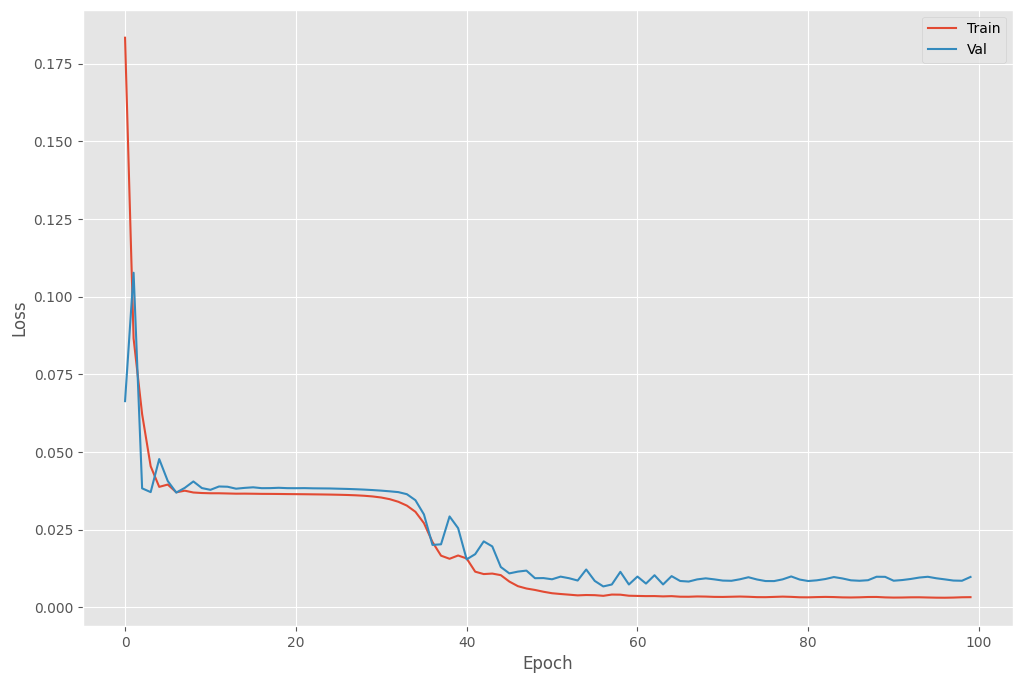

In [35]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(train_loss)),train_loss,label='Train')
plt.plot(np.arange(len(val_loss)),val_loss,label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [39]:
model.eval()
pred=model(torch.from_numpy(xtest_).float()).detach().numpy()
RMSE=np.sqrt(mean_squared_error(ytest_,pred))
r2=r2_score(ytest_,pred)
print('RMSE:',RMSE)
print('R_squared:',r2)

RMSE: 0.10121313574174925
R_squared: 0.6992456918960901


In [40]:
pred_test=stand.inverse_transform(pred)

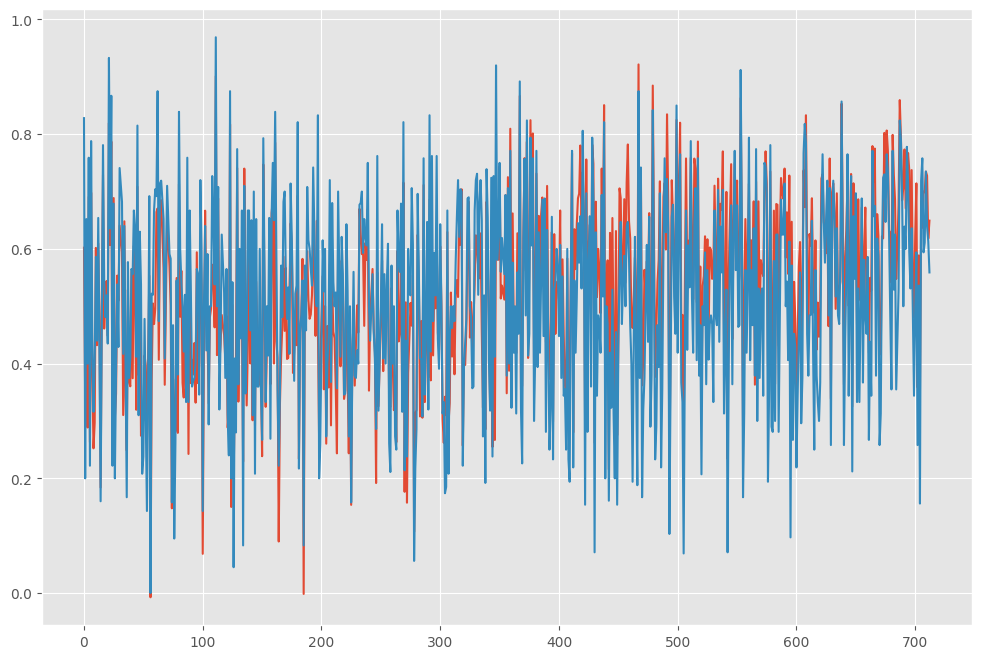

In [41]:
plt.figure(figsize=(12,8))
plt.plot(ytest.index,pred_test,label='test_predict')
plt.plot(ytest.index,ytest,label='test-true')

plt.show()

In [42]:
pred_test=pd.DataFrame(pred_test)
ytest.index=np.arange(ytest.shape[0])
result=pd.concat([ytest,pred_test],axis=1)

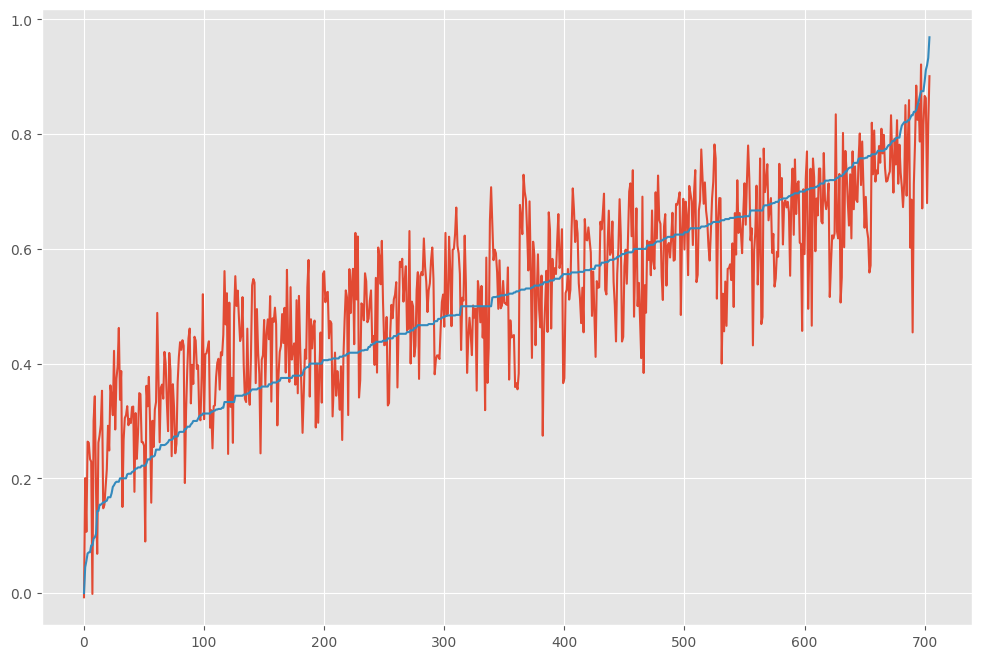

In [43]:
result.sort_values(by='W-L%',inplace=True)
plt.figure(figsize=(12,8))
plt.plot(np.arange(ytest.shape[0]),result.iloc[:,1],label='test_predict')
plt.plot(np.arange(ytest.shape[0]),result.iloc[:,0],label='test_true')
plt.show()